# Organización de Datos - TP 1 - INSTALLS

Alumnos:
- *Rodriguez, Agustín*
- *Scetta, María de los Ángeles*

In [1]:
#Carga de librerías a utilizar
import pandas as pd
import numpy as np
import missingno as msno
import calendar
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carga de datos recibidos
installs=pd.read_csv('../data/raw/installs.csv.gzip', compression='gzip', parse_dates=['created'])

## **Installs**

In [5]:
#Cantidad de registros y variables
installs.shape

(3412, 18)

In [6]:
#Revisión de valores nulos
installs.isna().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

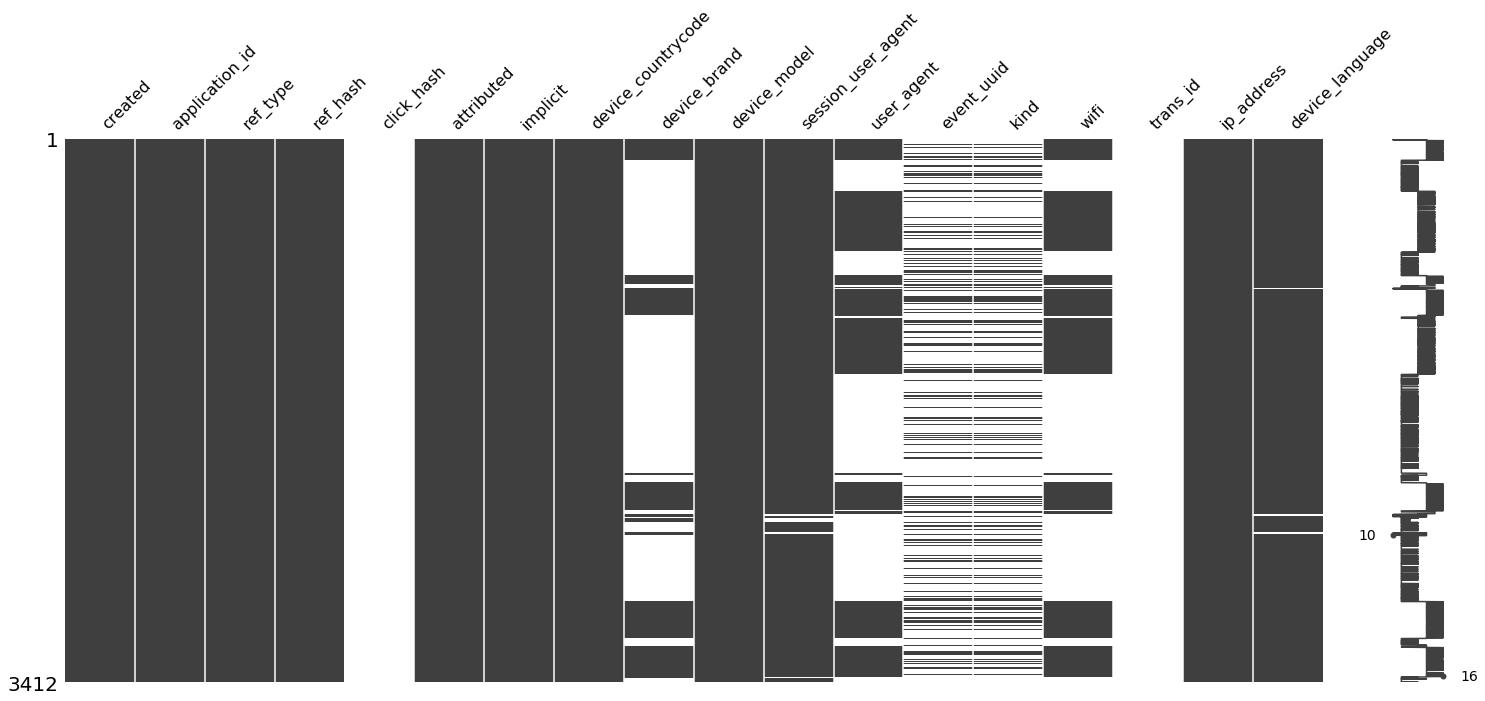

In [7]:
msno.matrix(installs)
plt.savefig('installs_matrix.png')

In [301]:
#Revisión de la estructura de datos
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,fecha,dia_semana,hora
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13,Wednesday,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13,Wednesday,4
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,...,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13,Wednesday,4
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,...,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13,Wednesday,4
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,...,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10,Sunday,22


###  **Análisis de las variables del dataset**

In [8]:
#Búsqueda de valores únicos
installs.nunique()

created               3412
application_id          31
ref_type                 2
ref_hash              3008
click_hash               0
attributed               1
implicit                 2
device_countrycode       2
device_brand            27
device_model           415
session_user_agent      12
user_agent             334
event_uuid             865
kind                    20
wifi                     2
trans_id                 4
ip_address            2717
device_language         30
dtype: int64

#### device_countrycode

In [9]:
installs.device_countrycode.value_counts()

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [229]:
country_code = installs[['device_countrycode']]
country_code_1 = installs[(installs['device_countrycode'] == 6333597102633388268)]
country_code_2 = installs[(installs['device_countrycode'] == 2970470518450881158)]

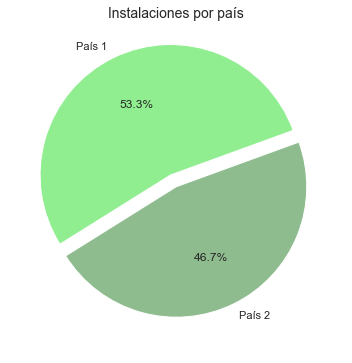

In [230]:
sizes = [country_code_1.device_countrycode.count(), country_code_2.device_countrycode.count()]
nombres = ['País 1', 'País 2']

plt.figure(figsize=(15, 6))
plt.title('Instalaciones por país', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'darkseagreen'], explode=(0.1, 0))
plt.savefig("installs_country.png")
plt.show()

#### created

In [3]:
#Revisión de la variable date
installs['fecha'] = installs['created'].dt.date
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,fecha
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10


In [4]:
#Función para nombrar días de la semana
def dia_semana(fecha):
    return calendar.day_name[fecha.weekday()]

In [5]:
installs['dia_semana'] = installs['fecha'].map(dia_semana)
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,fecha,dia_semana
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13,Wednesday
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13,Wednesday
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13,Wednesday
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13,Wednesday
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10,Sunday


In [8]:
#Cantidad de veces que se instaló una aplicación por día
installs_dia=installs.groupby(["fecha", "dia_semana"]).size().to_frame('cant_install').reset_index()
installs_dia

,fecha,dia_semana,cant_install
0,2019-03-05,Tuesday,337
1,2019-03-06,Wednesday,325
2,2019-03-07,Thursday,393
3,2019-03-08,Friday,366
4,2019-03-09,Saturday,368
5,2019-03-10,Sunday,351
6,2019-03-11,Monday,377
7,2019-03-12,Tuesday,472
8,2019-03-13,Wednesday,423


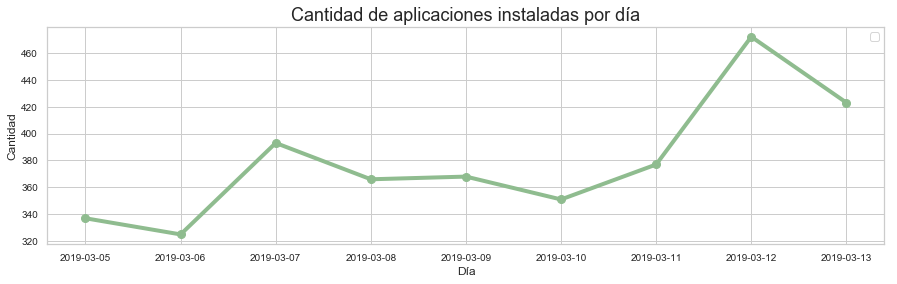

In [9]:
#Visualizar la cantidad apps instaladas por día
sns.set(style="whitegrid")
installs.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='darkseagreen', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de aplicaciones instaladas por día', fontsize=18)
plt.legend('')
plt.savefig("installs_dia.png")
plt.show()

In [323]:
installs.groupby("fecha").size().mean()

379.1111111111111

In [10]:
#Revisión de las instalaciones por hora
installs['hora'] = installs['created'].dt.hour
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,fecha,dia_semana,hora
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13,Wednesday,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13,Wednesday,4
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,...,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13,Wednesday,4
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,...,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13,Wednesday,4
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,...,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10,Sunday,22


In [11]:
hora_group=installs.groupby(["fecha","dia_semana", "hora"]).size().to_frame('cant_installs').reset_index()
hora_group.head()

,fecha,dia_semana,hora,cant_installs
0,2019-03-05,Tuesday,0,22
1,2019-03-05,Tuesday,1,21
2,2019-03-05,Tuesday,2,14
3,2019-03-05,Tuesday,3,11
4,2019-03-05,Tuesday,4,2


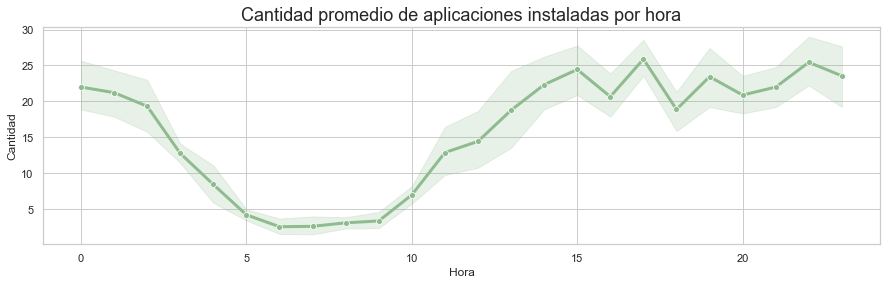

In [30]:
#Análisis de cantidad promedio de apps instaladas por hora
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_installs', linewidth=3, marker='o', markersize=6, data=hora_group, color='darkseagreen', ax=ax)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de aplicaciones instaladas por hora', fontsize=18)
plt.savefig("intalls_hora.png")
plt.show()

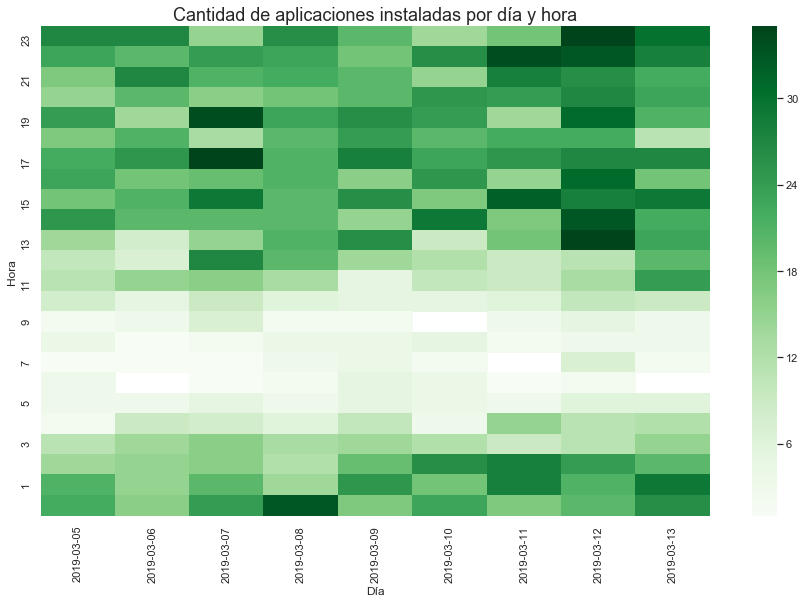

In [89]:
#Análisis de cantidad de aplicaciones instaladas por día y hora
installs_heatmap = hora_group.pivot_table(index='hora', columns='fecha', values='cant_installs', aggfunc='sum')
installs_heatmap = installs_heatmap.sort_index(ascending=False)
g = sns.heatmap(installs_heatmap, cmap="Greens")
g.set_title("Cantidad de aplicaciones instaladas por día y hora", fontsize=18)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(15)
fig.set_figheight(9)

plt.savefig("installs_dia_hora.png")

In [37]:
hora_group.loc[(hora_group.dia_semana == 'Saturday') | (hora_group.dia_semana == 'Sunday'), 'Categoria'] = 'Día Finde' 
hora_group.loc[(hora_group.dia_semana != 'Saturday') & (hora_group.dia_semana != 'Sunday'), 'Categoria'] = 'Día Hábil'
hora_group.head()

,fecha,dia_semana,hora,cant_installs,Categoria
0,2019-03-05,Tuesday,0,22,Día Hábil
1,2019-03-05,Tuesday,1,21,Día Hábil
2,2019-03-05,Tuesday,2,14,Día Hábil
3,2019-03-05,Tuesday,3,11,Día Hábil
4,2019-03-05,Tuesday,4,2,Día Hábil


ValueError: Could not interpret input 'Categoria'

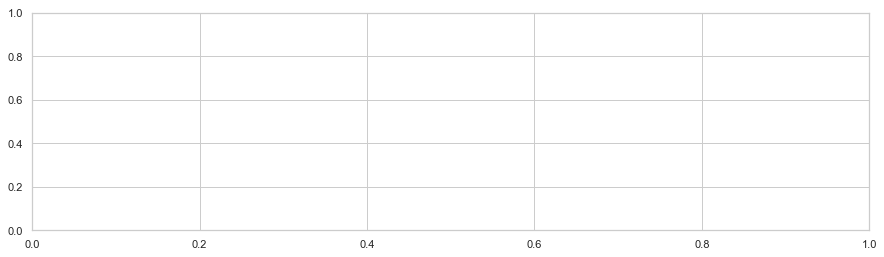

In [480]:
#Análisis de cantidad promedio de de apps instaladas por hora
paleta=['lightgreen', 'darkseagreen']
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_installs', hue= "Categoria", palette=paleta, linewidth=2, marker='o', markersize=4, data=hora_group, ax=ax)
plt.legend(ncol=1, loc='lower right');
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de aplicaciones instaladas por hora según tipo de día', fontsize=18)
plt.savefig("installs_tipo_dia_hora.png")
plt.show()

#### application_id

In [12]:
#Cantidad de veces que se instaló cada aplicación
installs_app=installs.groupby("application_id").size().to_frame('cantidad')
installs_app['cantidad'].sort_values(ascending=False).head()

application_id
7     947
9     731
10    389
16    362
8     328
Name: cantidad, dtype: int64

In [41]:
installs_app['cantidad'].sort_values(ascending=False).tail()

application_id
32    2
33    2
23    1
4     1
36    1
Name: cantidad, dtype: int64

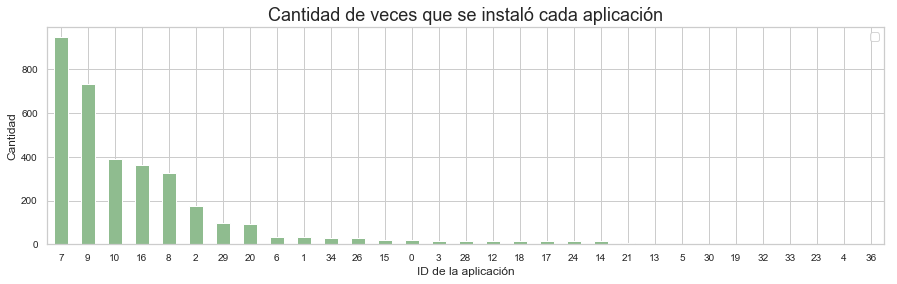

In [44]:
#Visualizar la cantidad de veces que se instaló cada aplicación
sns.set(style="whitegrid")
installs_app['cantidad'].sort_values(ascending=False).plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID de la aplicación', fontsize=12)
plt.title('Cantidad de veces que se instaló cada aplicación', fontsize=18)
plt.legend('')
plt.savefig("installs_application_id.png")
plt.show()

In [45]:
#Cantidad de veces que se instaló cada aplicación por día
installs_app_dia=installs.groupby(["application_id", "fecha"]).size().to_frame('cantidad').reset_index()
installs_app_dia[(installs_app_dia.application_id==7) | (installs_app_dia.application_id==9)]

,application_id,fecha,cantidad
45,7,2019-03-05,114
46,7,2019-03-06,102
47,7,2019-03-07,122
48,7,2019-03-08,108
49,7,2019-03-09,97
50,7,2019-03-10,90
51,7,2019-03-11,97
52,7,2019-03-12,108
53,7,2019-03-13,109
63,9,2019-03-05,60


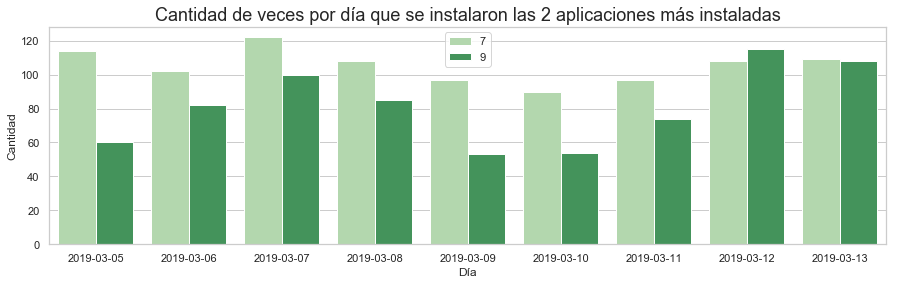

In [70]:
#Análisis de cantidad de apps instaladas por día
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cantidad", palette="Greens", hue="application_id",
            data=installs_app_dia[(installs_app_dia.application_id==7) | (installs_app_dia.application_id==9)]);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de veces por día que se instalaron las 2 aplicaciones más instaladas', fontsize=18)
plt.legend(ncol=1, loc='upper center'),
plt.savefig("installs_application_id_por_dia.png")
plt.show()

#### ref_type

In [13]:
installs.ref_type.value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [109]:
ref_type = installs[['ref_type']]
type_1 = installs[-(installs['ref_type'] == 1891515180541284343)]
type_2 = installs[(installs['ref_type'] == 1891515180541284343)]

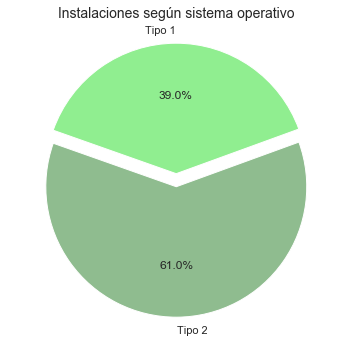

In [111]:
sizes = [type_1.ref_type.count(), type_2.ref_type.count()]
nombres = ['Tipo 1', 'Tipo 2']

plt.figure(figsize=(15, 6))
plt.title('Instalaciones según sistema operativo', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'darkseagreen'], explode=(0.1, 0))
plt.savefig("intalls_ref_type.png")
plt.show()

In [112]:
#Cantidad de veces que se instaló cada aplicación por día según sistema operativo
installs_reftype_dia=installs.groupby(["ref_type", "fecha"]).size().to_frame('cantidad').reset_index()
installs_reftype_dia['sistema'] = np.where(installs_reftype_dia['ref_type']==1891515180541284343, 'Tipo 2', 'Tipo 1')
installs_reftype_dia

,ref_type,fecha,cantidad,sistema
0,1494519392962156891,2019-03-05,130,Tipo 1
1,1494519392962156891,2019-03-06,138,Tipo 1
2,1494519392962156891,2019-03-07,164,Tipo 1
3,1494519392962156891,2019-03-08,142,Tipo 1
4,1494519392962156891,2019-03-09,140,Tipo 1
5,1494519392962156891,2019-03-10,132,Tipo 1
6,1494519392962156891,2019-03-11,131,Tipo 1
7,1494519392962156891,2019-03-12,183,Tipo 1
8,1494519392962156891,2019-03-13,172,Tipo 1
9,1891515180541284343,2019-03-05,207,Tipo 2


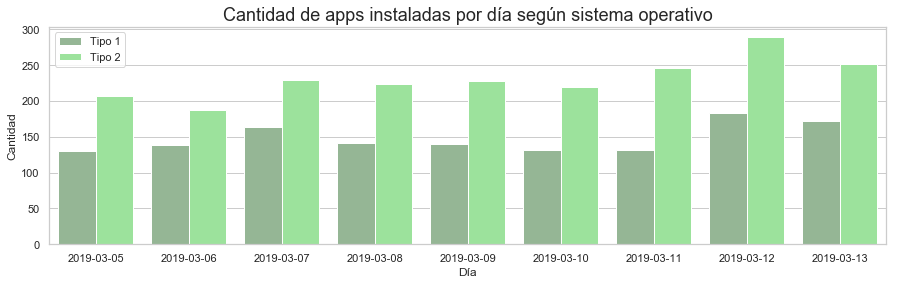

In [114]:
#Análisis de cantidad de apps instaladas por día según sistema operativo
paleta=['darkseagreen', 'lightgreen']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cantidad", palette=paleta, hue="sistema",
            data=installs_reftype_dia);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de apps instaladas por día según sistema operativo', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("installs_ref_type_por_dia.png")
plt.show()

#### ref_hash

In [79]:
installs.ref_hash.value_counts().head()

5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
Name: ref_hash, dtype: int64

In [115]:
#Cantidad de veces que cada usuario instaló aplicaciones por día
cant_usuarios_dia=installs.groupby(["ref_hash", "fecha"]).size().to_frame('cantidad')
cant_usuarios_dia['cantidad'].sort_values(ascending=False).head()

ref_hash             fecha     
3272750442824629569  2019-03-05    4
1838099903940931904  2019-03-08    3
4587898421740190562  2019-03-12    3
5707101515634134793  2019-03-09    3
2807966731127456435  2019-03-10    3
Name: cantidad, dtype: int64

In [398]:
#Cantidad de usuarios que instalaron aplicaciones por día
cant_usuarios=cant_usuarios_dia.groupby(["fecha"]).size().to_frame('cant_usuarios')
cant_usuarios

,cant_usuarios
fecha,
2019-03-05,311
2019-03-06,294
2019-03-07,345
2019-03-08,326
2019-03-09,333
2019-03-10,313
2019-03-11,330
2019-03-12,402
2019-03-13,372


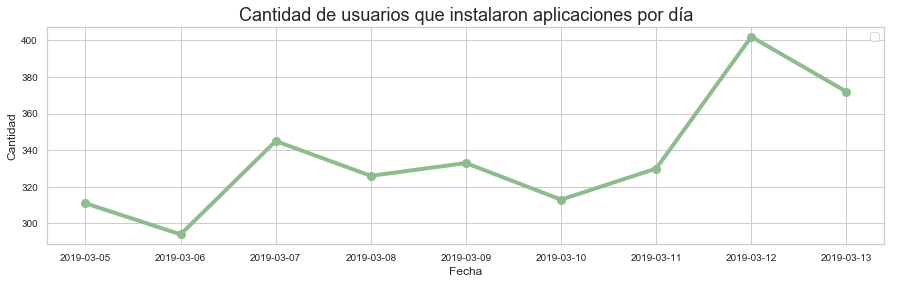

In [399]:
#Visualizar la cantidad de usuarios que instalaron aplicaciones por día
sns.set(style="whitegrid")
cant_usuarios_dia.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='darkseagreen', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de usuarios que instalaron aplicaciones por día', fontsize=18)
plt.legend('')
plt.savefig("installs_usuarios_dia.png")
plt.show()

In [130]:
cant_usuarios_dia.groupby("fecha").size().mean()

336.22222222222223

In [400]:
hora_group_usuarios=installs.groupby(["ref_hash","fecha","dia_semana","hora"]).size().to_frame('cant_usuarios').reset_index()
hora_group_usuarios=hora_group_usuarios.groupby(["fecha","dia_semana","hora"]).size().to_frame('cant_usuarios').reset_index()
hora_group_usuarios.head()

,fecha,dia_semana,hora,cant_usuarios
0,2019-03-05,Tuesday,0,21
1,2019-03-05,Tuesday,1,19
2,2019-03-05,Tuesday,2,14
3,2019-03-05,Tuesday,3,11
4,2019-03-05,Tuesday,4,2


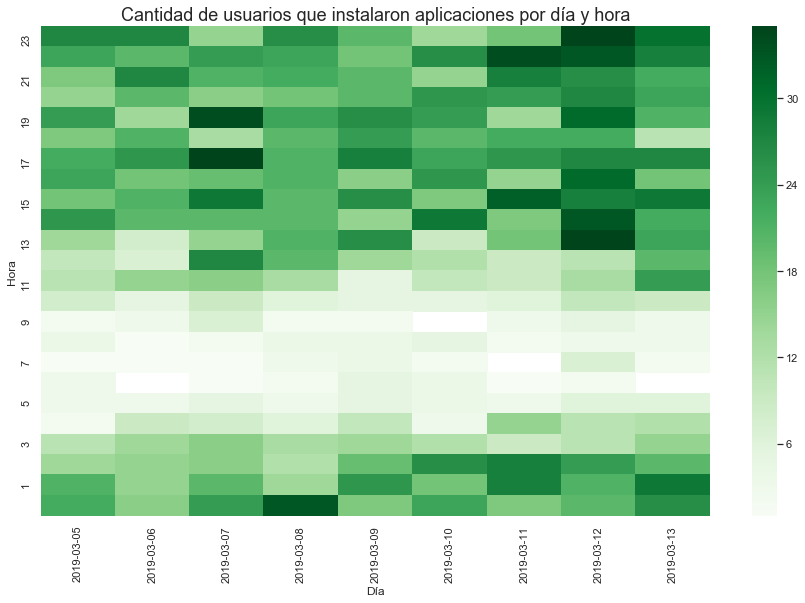

In [131]:
#Análisis de cantidad de usuarios que instalaron aplicaciones por día y hora
usuarios_heatmap = hora_group_usuarios.pivot_table(index='hora', columns='fecha', values='cant_usuarios', aggfunc='sum')
usuarios_heatmap = usuarios_heatmap.sort_index(ascending=False)
g = sns.heatmap(installs_heatmap, cmap="Greens")
g.set_title("Cantidad de usuarios que instalaron aplicaciones por día y hora", fontsize=18)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(15)
fig.set_figheight(9)

plt.savefig("installs_usuarios_dia_hora.png")

In [241]:
#Análisis de la cantidad de usuarios que instalaron apps según país
installs_user_country=installs.groupby(["ref_hash", "device_countrycode", "fecha"]).size().to_frame('cant').reset_index()
installs_user_country['country'] = np.where(installs_user_country['device_countrycode']==6333597102633388268, 'País 1', 'País 2')
installs_user_country=installs_user_country.groupby(["country", "fecha"]).size().to_frame('cant').reset_index()
installs_user_country

,country,fecha,cant
0,País 1,2019-03-05,121
1,País 1,2019-03-06,128
2,País 1,2019-03-07,162
3,País 1,2019-03-08,148
4,País 1,2019-03-09,159
5,País 1,2019-03-10,141
6,País 1,2019-03-11,180
7,País 1,2019-03-12,232
8,País 1,2019-03-13,196
9,País 2,2019-03-05,190


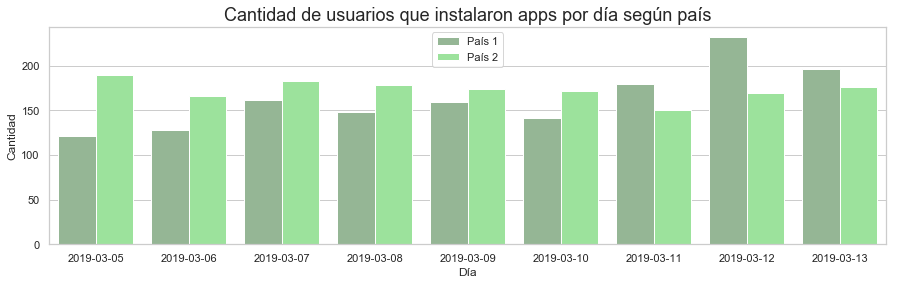

In [244]:
#Visualización de la cantidad de usuarios que instalaron apps según país
paleta=['darkseagreen', 'lightgreen']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant", palette=paleta, hue="country",
            data=installs_user_country);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de usuarios que instalaron apps por día según país', fontsize=18)
plt.legend(ncol=1, loc='upper center'),
plt.savefig("installs_user_pais.png")
plt.show()

#### attributed

In [132]:
installs.attributed.value_counts()

False    3412
Name: attributed, dtype: int64

#### implicit

In [133]:
installs.implicit.value_counts()

False    2547
True      865
Name: implicit, dtype: int64

#### device_brand

In [380]:
#Cantidad de veces que se instaló cada aplicación por marca de dispositivo
installs_marca=installs.groupby("device_brand").size().to_frame('cantidad').reset_index()
installs_marca['cantidad'].sort_values(ascending=False).head()

0     472
4     185
6     116
21     72
8      40
Name: cantidad, dtype: int64

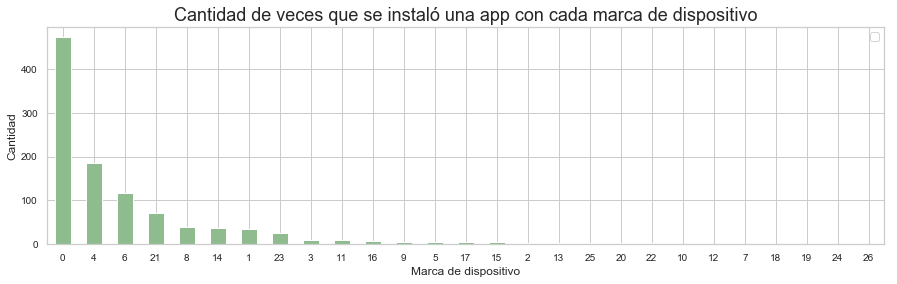

In [262]:
#Visualizar la cantidad de veces que se instaló una app con cada marca de dispositivo
sns.set(style="whitegrid")
installs_marca['cantidad'].sort_values(ascending=False).plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Marca de dispositivo', fontsize=12)
plt.title('Cantidad de veces que se instaló una app con cada marca de dispositivo', fontsize=18)
plt.legend('')
plt.savefig("installs_marca_device.png")
plt.show()

#### device_model

In [159]:
#Cantidad de veces que se instaló cada aplicación por modelo de dispositivo
installs_modelo=installs.groupby("device_model").size().to_frame('cantidad').reset_index()
installs_modelo['cantidad'].sort_values(ascending=False).head()

94     759
308    276
112     76
349     65
123     63
Name: cantidad, dtype: int64

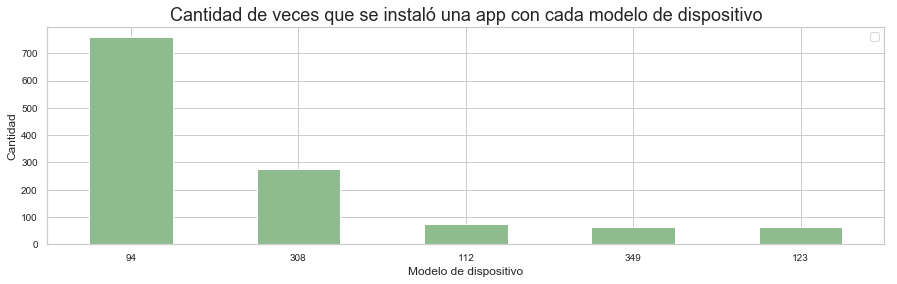

In [157]:
#Visualizar la cantidad de veces que se instaló una app con cada modelo de dispositivo
sns.set(style="whitegrid")
installs_modelo['cantidad'].sort_values(ascending=False).head().plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Modelo de dispositivo', fontsize=12)
plt.title('Cantidad de veces que se instaló una app con cada modelo de dispositivo', fontsize=18)
plt.legend('')
plt.savefig("installs_modelo_device.png")
plt.show()

#### session_user_agent

In [161]:
installs.session_user_agent.value_counts()

http-kit/2.0                                                                                                                                                                                                                                                                  1729
adjust.com                                                                                                                                                                                                                                                                    1592
HasOffers Mobile AppTracking v1.0                                                                                                                                                                                                                                               22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1                                      

####  user_agent

In [165]:
installs.user_agent.value_counts().head(10)

MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0                            393
MercadoPago/2.59.0.1 CFNetwork/976 Darwin/18.2.0                            141
MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0                             89
Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-G610M Build/M1AJQ)                 37
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-J500M Build/MMB29M)                36
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532MT Build/MMB29T)               36
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570M Build/R16NW)                 28
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532M Build/MMB29T)                22
Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 Build/NRD90U)                   18
Dalvik/2.1.0 (Linux; U; Android 7.1.1; Moto G Play Build/NPIS26.48-43-2)     17
Name: user_agent, dtype: int64

#### event_uuid

In [166]:
installs.event_uuid.value_counts().head(10)

c6e5015d-1055-40d3-82ed-6fc224fac962    1
6fda0300-8c65-495f-8082-d7e2001ba3f3    1
ee20d2b2-d3fe-446a-812f-05f6aedc6f10    1
d4ac60ac-bff5-4fb2-89a8-7cfecc0be399    1
7198bd24-0092-4f10-b5bc-1402a19f481c    1
1e161901-3af0-4156-8b41-16be643ba924    1
734dd7ff-ee97-48e6-8a90-40e96e45e5a9    1
18f67106-cbed-42ea-b11e-4af037c94930    1
a49ebd01-296d-401f-be03-24f97afaf326    1
b8547b7b-f244-4c08-a4b5-0785c5f3722f    1
Name: event_uuid, dtype: int64

In [170]:
#Cantidad de ids únicos de la instalación por día
installs_idevento_dia=installs.groupby(["fecha", "event_uuid"]).size().to_frame('cant_id_event').reset_index()
installs_idevento_dia.head(10)

,fecha,event_uuid,cant_id_event
0,2019-03-05,0386e031-2251-4722-9711-10a1e9de12b5,1
1,2019-03-05,0755b8ba-a8d9-4394-8644-bf400ea3e343,1
2,2019-03-05,170a3523-31bd-45ed-9fc8-5e502172d230,1
3,2019-03-05,17287de8-e478-47d5-8504-fc5d7ed45e69,1
4,2019-03-05,17fc487c-3668-445a-b230-b6d67f4467d2,1
5,2019-03-05,219765a7-e293-4b15-9c36-4065a2368677,1
6,2019-03-05,26237678-4393-449d-aeba-53a867b41088,1
7,2019-03-05,27168c47-a713-450a-876a-14158a6fa6fb,1
8,2019-03-05,29aa4140-1842-45a1-9328-d59db26c384c,1
9,2019-03-05,29eca53f-c241-4311-8911-97c2e2b2c497,1


In [401]:
id_evento_dia=installs_idevento_dia.groupby("fecha").size().to_frame('cant_id_install')
id_evento_dia

,cant_id_install
fecha,
2019-03-05,72
2019-03-06,81
2019-03-07,119
2019-03-08,94
2019-03-09,88
2019-03-10,88
2019-03-11,97
2019-03-12,123
2019-03-13,103


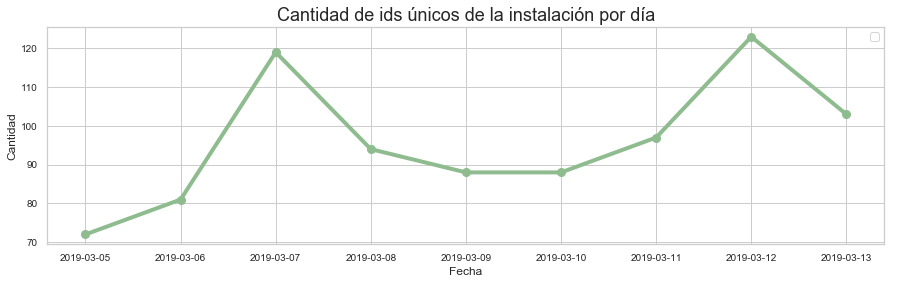

In [402]:
#Visualizar la cantidad de ids únicos de la instalación por día
sns.set(style="whitegrid")
installs_idevento_dia.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='darkseagreen', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de ids únicos de la instalación por día', fontsize=18)
plt.legend('')
plt.savefig("installs_idevent_dia.png")
plt.show()

####  kind

In [173]:
installs.kind.value_counts()

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
EVENT_HOMEPAGE                  6
deeplink                        5
reattribution                   4
payment method add              3
registration                    3
journey first drop off          2
EVENT_PROMO                     1
journey drop off                1
journey reserved                1
install                         1
af_list_view                    1
Name: kind, dtype: int64

In [182]:
#Cantidad de tipos de instalación por día
installs_kind=installs.groupby(["kind", "fecha"]).size().to_frame('cant_kind').reset_index()
installs_kind.head()

,kind,fecha,cant_kind
0,EVENT_HOMEPAGE,2019-03-06,1
1,EVENT_HOMEPAGE,2019-03-07,2
2,EVENT_HOMEPAGE,2019-03-10,1
3,EVENT_HOMEPAGE,2019-03-12,1
4,EVENT_HOMEPAGE,2019-03-13,1


In [403]:
#Agrupar cantidad de tipos de instalación por día
install_kind_dia=installs_kind.groupby("fecha").size().sort_values(ascending=False).to_frame('cant_kind_inst')
install_kind_dia

,cant_kind_inst
fecha,
2019-03-13,13
2019-03-09,13
2019-03-08,12
2019-03-12,11
2019-03-11,11
2019-03-07,11
2019-03-10,9
2019-03-06,8
2019-03-05,8


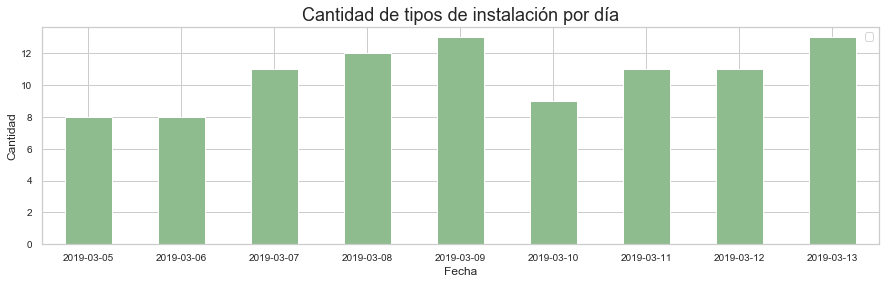

In [404]:
#Visualizar la cantidad de tipos de instalación por día
sns.set(style="whitegrid")
installs_kind.groupby("fecha").size().plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de tipos de instalación por día', fontsize=18)
plt.legend('')
plt.savefig("installs_kind.png")
plt.show()

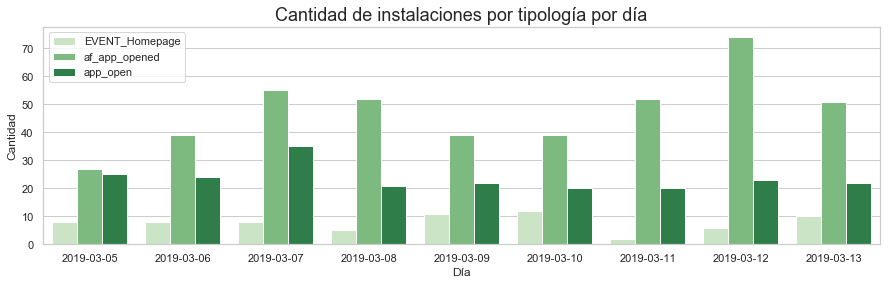

In [405]:
#Análisis de la cantidad de instalaciones por tipología por día
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant_kind", palette="Greens", hue="kind",
            data=installs_kind[(installs_kind.kind=="af_app_opened") | (installs_kind.kind=="app_open")
                               | (installs_kind.kind=="EVENT_Homepage")]);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de instalaciones por tipología por día', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("installs_kind_por_dia.png")
plt.show()

####  wifi

In [202]:
installs.wifi.value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [209]:
wifi = installs[['wifi']]
con_wifi = installs[-(installs['wifi'] == False)]
sin_wifi = installs[(installs['wifi'] == False)]

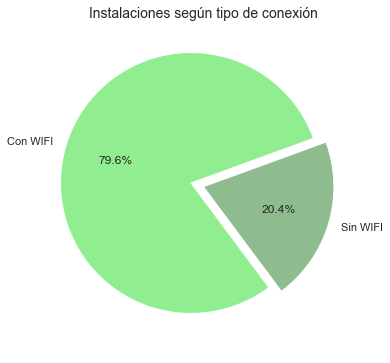

In [211]:
sizes = [con_wifi.wifi.count(), sin_wifi.wifi.count()]
nombres = ['Con WIFI', 'Sin WIFI']

plt.figure(figsize=(15, 6))
plt.title('Instalaciones según tipo de conexión', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'darkseagreen'], explode=(0.1, 0))
plt.savefig("intalls_wifi_pct.png")
plt.show()

In [203]:
#Cantidad de instalación por día según tipo de conexión
installs_wifi=installs.groupby(["wifi", "fecha"]).size().to_frame('cant_wifi').reset_index()
installs_wifi.head()

,wifi,fecha,cant_wifi
0,False,2019-03-05,37
1,False,2019-03-06,45
2,False,2019-03-07,38
3,False,2019-03-08,40
4,False,2019-03-09,29


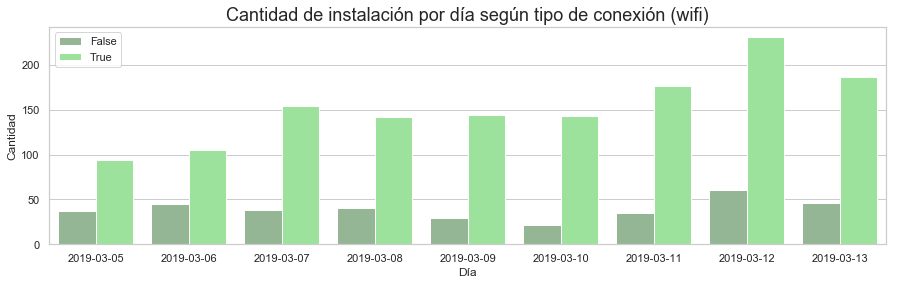

In [214]:
#Análisis de la cantidad de instalación por día según tipo de conexión
paleta=['darkseagreen', 'lightgreen']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant_wifi", palette=paleta, hue="wifi",
            data=installs_wifi);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de instalación por día según tipo de conexión (wifi)', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("installs_wifi_dia.png")
plt.show()

####  ip_address

In [279]:
installs.ip_address.value_counts().head()

1992632945768888579    33
2403839579048525602    26
2394721645995561079    17
589886713227299026     16
8262991154202232888    14
Name: ip_address, dtype: int64

In [409]:
#Análisis de la cantidad de IPs que instalaron apps por día
installs_ip_dia=installs.groupby(["ip_address", "fecha"]).size().to_frame('cant').reset_index()
installs_ip_dia2=installs_ip_dia.groupby("fecha").size().sort_values(ascending=False).to_frame('cant_ips')
installs_ip_dia2

,cant_ips
fecha,
2019-03-12,378
2019-03-13,359
2019-03-07,333
2019-03-09,322
2019-03-11,321
2019-03-08,314
2019-03-05,303
2019-03-10,295
2019-03-06,285


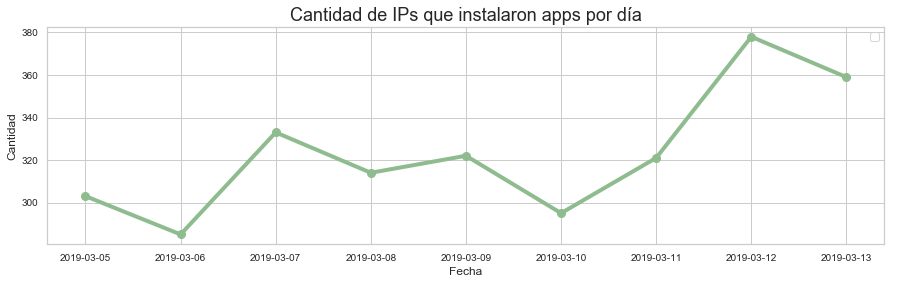

In [407]:
#Visualizar la cantidad de IPS por día
sns.set(style="whitegrid")
installs_ip_dia.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='darkseagreen', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de IPs que instalaron apps por día', fontsize=18)
plt.legend('')
plt.savefig("installs_ip_x_dia.png")
plt.show()

In [239]:
#Análisis de la cantidad de IPs que instalaron apps según país
installs_ip_country=installs.groupby(["ip_address", "device_countrycode", "fecha"]).size().to_frame('cant').reset_index()
installs_ip_country['country'] = np.where(installs_ip_country['device_countrycode']==6333597102633388268, 'País 1', 'País 2')
installs_ip_country=installs_ip_country.groupby(["country", "fecha"]).size().to_frame('cant').reset_index()
installs_ip_country

,country,fecha,cant
0,País 1,2019-03-05,115
1,País 1,2019-03-06,122
2,País 1,2019-03-07,153
3,País 1,2019-03-08,136
4,País 1,2019-03-09,148
5,País 1,2019-03-10,123
6,País 1,2019-03-11,170
7,País 1,2019-03-12,209
8,País 1,2019-03-13,182
9,País 2,2019-03-05,188


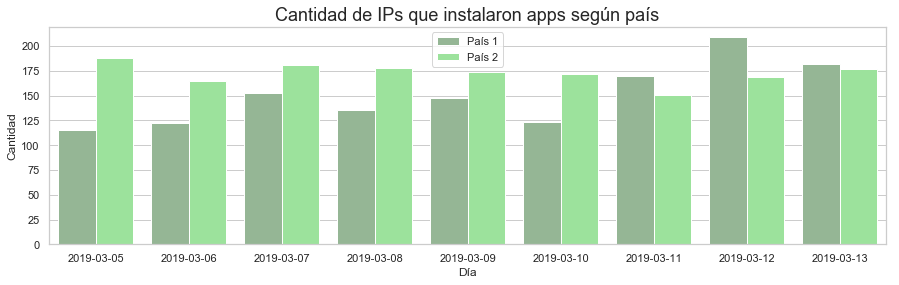

In [251]:
#Visualización de la cantidad de IPs que instalaron apps según país
paleta=['darkseagreen', 'lightgreen']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant", palette=paleta, hue="country",
            data=installs_ip_country);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de IPs que instalaron apps según país', fontsize=18)
plt.legend(ncol=1, loc='upper center'),
plt.savefig("installs_ip_pais.png")
plt.show()

####  device_language

In [287]:
installs.device_language.value_counts().head()

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
Name: device_language, dtype: int64

In [319]:
#Cantidad de veces que se instaló cada aplicación por idioma del dispositivo
installs_language=installs.groupby("device_language").size().to_frame('cantidad').reset_index()
installs_language['cantidad'].sort_values(ascending=False).head(10)

13    1484
29     714
18     632
26     238
3       70
6       56
15      48
1       39
21      24
5       21
Name: cantidad, dtype: int64

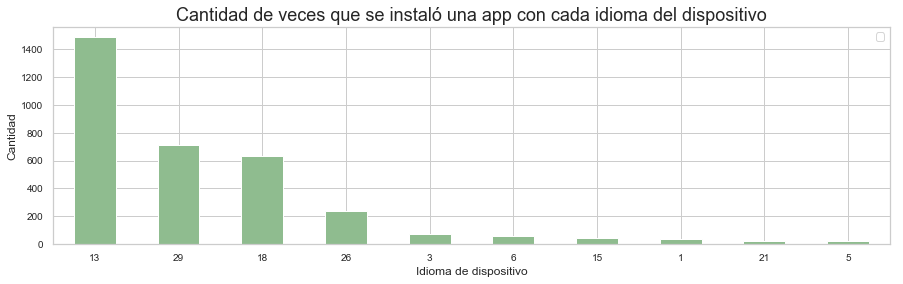

In [320]:
#Visualizar la cantidad de veces que se instaló una app con cada idioma del dispositivo
sns.set(style="whitegrid")
installs_language['cantidad'].sort_values(ascending=False).head(10).plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Idioma de dispositivo', fontsize=12)
plt.title('Cantidad de veces que se instaló una app con cada idioma del dispositivo', fontsize=18)
plt.legend('')
plt.savefig("installs_language_device.png")
plt.show()

In [362]:
#Cantidad de veces que se instaló cada aplicación por idioma del dispositivo
installs_language_dia=installs.groupby(["fecha","device_language"]).size().to_frame('cantidad')
installs_language_dia.cantidad.sort_values(ascending=False).head()

fecha       device_language
2019-03-07  3.301378e+18       181
2019-03-05  3.301378e+18       173
2019-03-13  3.301378e+18       171
2019-03-10  3.301378e+18       169
2019-03-09  3.301378e+18       168
Name: cantidad, dtype: int64

In [413]:
#Agrupar cantidad de lenguajes por día
cant_languages=installs_language_dia.groupby("fecha").size().sort_values(ascending=False).to_frame('cant_language')
cant_languages

,cant_language
fecha,
2019-03-11,18
2019-03-09,15
2019-03-07,15
2019-03-06,14
2019-03-05,14
2019-03-12,13
2019-03-08,13
2019-03-13,12
2019-03-10,10


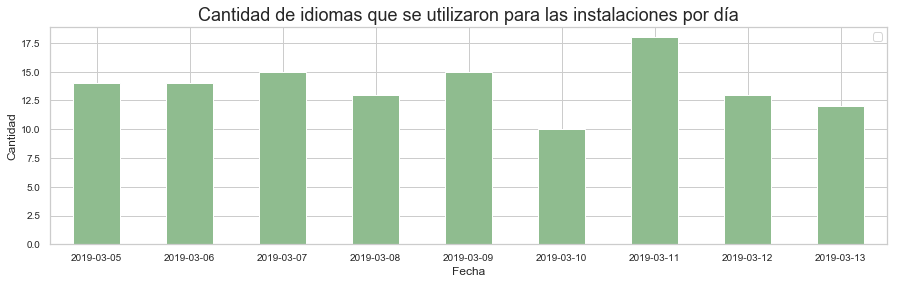

In [358]:
#Visualizar la cantidad de lenguajes de instalación por día
sns.set(style="whitegrid")
installs_language_dia.groupby("fecha").size().plot.bar(rot=0, figsize=(15,4), color='darkseagreen', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de idiomas que se utilizaron para las instalaciones por día', fontsize=18)
plt.legend('')
plt.savefig("installs_language_dia.png")
plt.show()